In [ ]:
import torch
import requests
import matplotlib.pyplot as plt

In [6]:
#아이리스 데이터 다운받기
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)

r.content
with open("iris.data", "wb") as f:
  f.write(r.content)

In [8]:
#iris data 불러오기 및 포멧 변환
vectors = []
answers = []

with open("iris.data", "r") as f:
  for line in f:
    if len(line.strip()) == 0: continue
    items = line.strip().split(",")
    vectors.append([float(i) for i in items[:4]])
    answers.append(items[4])

print(vectors[:3])
print(answers[:3])
print(len(vectors))
print(len(answers))

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2]]
['Iris-setosa', 'Iris-setosa', 'Iris-setosa']
150
150


In [23]:
# 축 옮기기

X = torch.FloatTensor(vectors)

Z = X - torch.mean(X, axis=0)

In [34]:
# Z에서 주성분 찾기
X = torch.FloatTensor(vectors)

Z = X - torch.mean(X, axis=0)

def findPC(Z):

  w = torch.randn(Z.shape[1])
  # 단위백터로 만들어주기
  w = w / (w ** 2).sum() ** 0.5
  #(w**2).sum()

  lr = 0.01

  for epoch in range(1001):
    w.requires_grad_(True)
    variance = ((Z * w).sum(axis=1) ** 2).mean()

    variance.backward()
    with torch.no_grad():
      w = w + lr * w.grad
      w = w / (w ** 2).sum() ** 0.5

  return w, variance.item()

def PCA(Z, n):
  W, V = [], []
  for _ in range(n):
    w, v = findPC(Z)
    W.append(w.tolist())
    V.append(v)
    Z = Z - (Z * w).sum(axis=1).view(-1, 1) * w
  
  return W, V

def transform(Z, W):
  return torch.mm(Z, torch.Tensor(W).T)

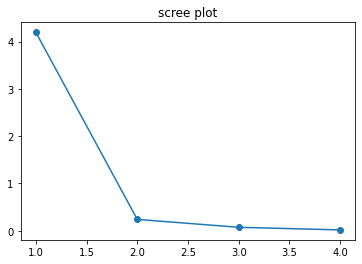

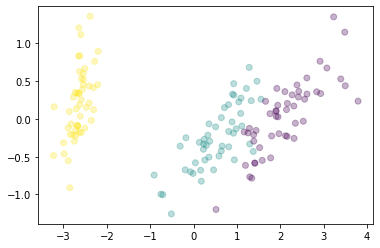

In [35]:
W ,V = PCA(Z, 4)

plt.title("scree plot")
plt.plot(range(1, len(V)+1), V, "-o")
plt.show()

species = {s:i for i, s in enumerate(set(answers))}

K = transform(Z, W)
plt.scatter(K[:, 0], K[:, 1], c=[species[a] for a in answers], alpha=0.3)
plt.show()

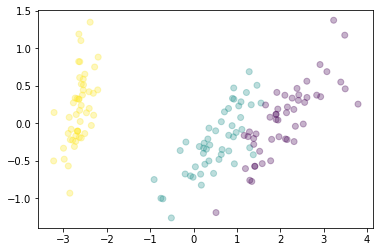

In [36]:
# 사이킷런 사용해보기
from sklearn import decomposition

pca = decomposition.PCA(4)
pca.fit(X)
T = pca.transform(X)

plt.scatter(T[:, 0], T[:, 1], c=[species[a] for a in answers], alpha=0.3)
plt.show()